In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import re
import sys 
import math

import cptac
import cptac.utils as u
import plot_utils as p

In [3]:
def merge_data_frames2(cancer):
    egfr = cancer.get_genotype_all_vars("EGFR")
    compare = ['Wildtype_Tumor','Amplification']
    get = egfr['Mutation'].isin(compare)
    egfr_amp_wt = egfr[get]
    
    
    pten = cancer.get_genotype_all_vars("PTEN")
    compare = ['Wildtype_Tumor','Deletion']
    get = pten['Mutation'].isin(compare)
    pten_del_wt = pten[get]
    all_mut = pd.merge(pten_del_wt, egfr_amp_wt, on="Patient_ID", how = "outer")
    all_mut = all_mut.rename(columns={"Mutation_x": "PTEN_Mutation","Mutation_y":"EGFR_Mutation"  })
    
    all_mut = all_mut[["EGFR_Mutation","PTEN_Mutation"]]
    return all_mut

In [4]:
def HasMutation(row):
    hasMut1 = False
    hasMut2 = False
    for item in row:
        if pd.isnull(item):
            continue
        if item == "Amplification":
            hasMut1 = True
        if item == "Deletion":
            hasMut2 = True
            
    if hasMut1 & hasMut2:
        return "Both"
    if hasMut1 & (hasMut2 == False):
        return "EGFR_mut"
    if (hasMut1 == False) & hasMut2:
        return "Pten_mut"
    return "Wildtype_tumor"

In [10]:
g = cptac.Gbm()
l = cptac.Luad()
#hnscc = cptac.Hnscc()

cptac warning: The GBM dataset is under publication embargo until March 01, 2021. CPTAC is a community resource project and data are made available rapidly after generation for community research use. The embargo allows exploring and utilizing the data, but analysis may not be published until after the embargo date. Please see https://proteomics.cancer.gov/data-portal/about/data-use-agreement or enter cptac.embargo() to open the webpage for more details. (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 1)


cptac warning: The LUAD dataset is under publication embargo until July 01, 2020. CPTAC is a community resource project and data are made available rapidly after generation for community research use. The embargo allows exploring and utilizing the data, but analysis may not be published until after the embargo date. Please see https://proteomics.cancer.gov/data-portal/about/data-use-agreement or enter cptac.embargo() to open the webpage for more details. (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


In [13]:
gbm = merge_data_frames2(g)
gbm["Mutation_type"] = gbm.apply(HasMutation, axis = 1)
gbm.head(5)

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 83 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/cptac/dataset.py, line 313)
cptac warning: CNV data was not found for the following samples, so CNV data columns were filled with NaN for these samples: C3L-01834 (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/cptac/dataset.py, line 313)
cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 72 samples for the PTEN gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/cptac/dataset.py, line 313)
cptac warning: CNV data was not found for the following samples, so CNV data columns were filled with NaN for these samples: C3L-01834 (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/cptac/dataset.py, line 313)


Name,EGFR_Mutation,PTEN_Mutation,Mutation_type
Patient_ID,,,
C3L-00104,Amplification,Deletion,Both
C3L-00365,NaN,Deletion,Pten_mut
C3L-00674,Amplification,Deletion,Both
C3L-00677,Amplification,Deletion,Both
C3L-01040,Amplification,Deletion,Both


In [6]:
protomics = g.get_proteomics()
prot = protomics[["CD4","SYK","MCM2","MCM4","EGFR","PTEN","GRB2","VEGFA","F3","CD274"]]

In [7]:

prot_mut = pd.merge(gbm, prot, on="Patient_ID", how = "inner")
prot_mut.head(20)

Name,EGFR_Mutation,PTEN_Mutation,Mutation_type,CD4,SYK,MCM2,MCM4,EGFR,PTEN,GRB2,VEGFA,F3,CD274
Patient_ID,,,,,,,,,,,,,
C3L-00104,Amplification,Deletion,Both,-0.348156,-0.396156,0.865204,0.836100,1.054962,-0.431991,0.005740,1.508887,-0.399432,-0.297551
C3L-00365,NaN,Deletion,Pten_mut,-0.174919,-0.405143,0.943165,0.842492,2.219562,-0.265044,-0.753223,0.474423,0.849939,0.295885
C3L-00674,Amplification,Deletion,Both,0.324480,0.565983,-0.236399,-0.092442,0.137329,0.390190,0.231245,0.411238,-0.882370,-0.653655
C3L-00677,Amplification,Deletion,Both,-0.457509,-0.180069,-0.093372,-0.115375,-0.768478,-0.915526,-0.209354,-1.433164,-0.296643,-0.238471
C3L-01040,Amplification,Deletion,Both,-0.583125,-0.360852,-0.957693,-1.071222,-1.249435,0.680291,-0.471144,0.616348,0.617005,0.967423
C3L-01043,Amplification,Deletion,Both,0.105619,0.557408,0.152897,0.160211,0.721186,-0.580510,0.062017,-0.042036,-0.173612,-0.474315
C3L-01045,Amplification,Deletion,Both,-0.190489,0.192672,0.463109,0.304475,0.423029,0.093666,-0.070315,2.030398,-0.987216,0.698645
C3L-01046,Amplification,Deletion,Both,1.439368,1.360826,0.113851,0.008782,-0.967750,-0.341718,0.840417,0.467765,0.594193,1.406910
C3L-01048,Amplification,Deletion,Both,-0.386704,-0.481321,0.248386,0.239479,3.496717,-0.068617,-0.902563,-0.534408,0.155343,0.732958


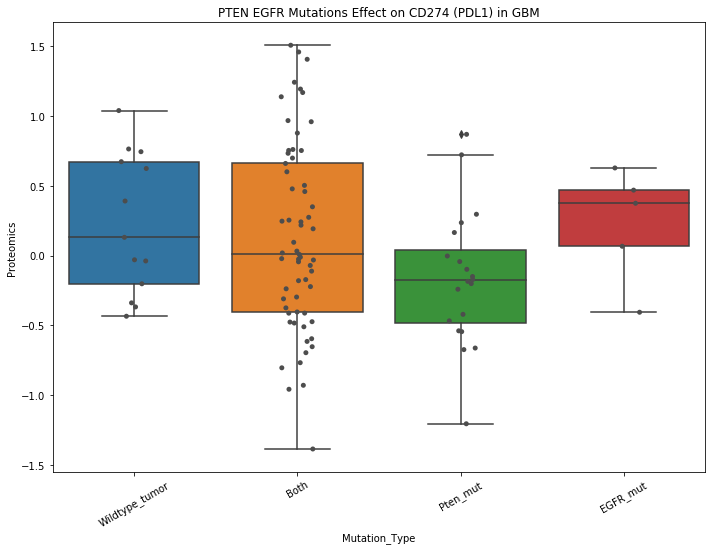

In [10]:
a4_dims = (11.7, 8.27) #dimensions for bigger plot
fig, ax = plt.subplots(figsize=a4_dims)
gene = "CD274"
somatic_boxplot = sns.boxplot(data=prot_mut, x= "Mutation_type", y=gene, ax = ax, 
                              order=["Wildtype_tumor","Both","Pten_mut","EGFR_mut"]) 
                                        # order parameter is used to reorder the mutation categories 
somatic_boxplot.set_title("PTEN EGFR Mutations Effect on CD274 (PDL1) in GBM" )
somatic_boxplot = sns.stripplot(data=prot_mut, x="Mutation_type" ,y=gene,jitter=True, 
                                color=".3", order=["Wildtype_tumor","Both","Pten_mut","EGFR_mut"])
somatic_boxplot.set(xlabel="Mutation_Type",ylabel="Proteomics")
somatic_boxplot.set_xticklabels(somatic_boxplot.get_xticklabels(),rotation=30) # Rotate labels to avoid overlap
plt.show()

In [18]:
luad = merge_data_frames2(l)
luad["Mutation_type"] = luad.apply(HasMutation, axis = 1)
luad.head(5)

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 69 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/cptac/dataset.py, line 313)


Name,EGFR_Mutation,PTEN_Mutation,Mutation_type
Patient_ID,,,
C3L-00001,Amplification,Deletion,Both
C3L-00080,Wildtype_Tumor,Deletion,Pten_mut
C3L-00422,Wildtype_Tumor,Deletion,Pten_mut
C3L-00510,NaN,Deletion,Pten_mut
C3L-02365,Amplification,Deletion,Both


In [19]:
protomics = l.get_proteomics()

prot = protomics[["CD4","MCM3","MCM2","MCM4"]]
prot.columns = prot.columns.droplevel(1)

In [20]:

prot_mut = pd.merge(luad, prot, on="Patient_ID", how = "inner")
prot_mut.head(5)

Name,EGFR_Mutation,PTEN_Mutation,Mutation_type,CD4,MCM3,MCM2,MCM4
Patient_ID,,,,,,,
C3L-00001,Amplification,Deletion,Both,-0.1457,-2.5978,-3.1627,-2.7335
C3L-00080,Wildtype_Tumor,Deletion,Pten_mut,-0.7969,2.5681,2.2176,2.7099
C3L-00422,Wildtype_Tumor,Deletion,Pten_mut,-1.5317,-1.9114,-1.8750,-1.1588
C3L-00510,NaN,Deletion,Pten_mut,-5.2368,3.2001,3.0513,3.6262
C3L-02365,Amplification,Deletion,Both,-0.9003,0.8588,0.8426,1.3560
